# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

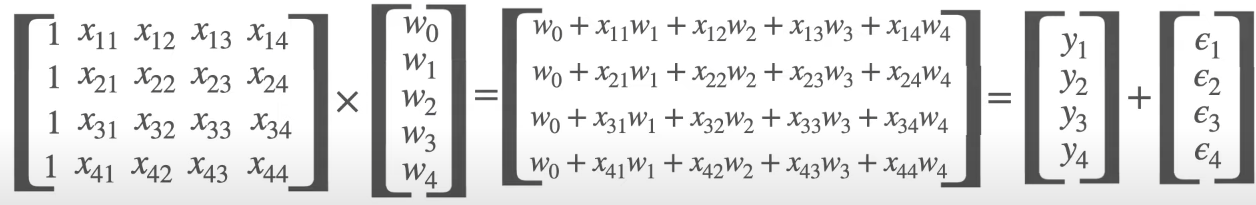

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю (ошибки с разных сторон должны компенсировать друг друга, не должно быть перекоса с одной стороны).
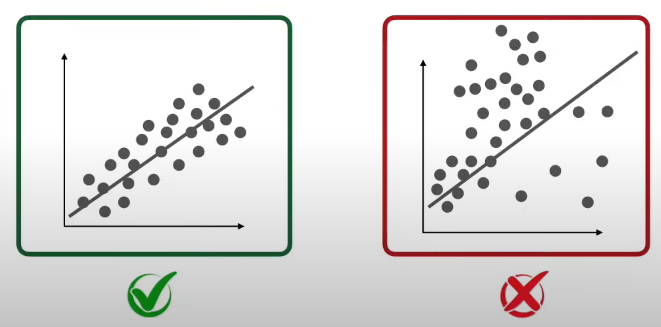
* дисперсия случайных ошибок одинакова и конечна (ошибки идут примерно около тренда, нет сильно удалённых, выбросов).
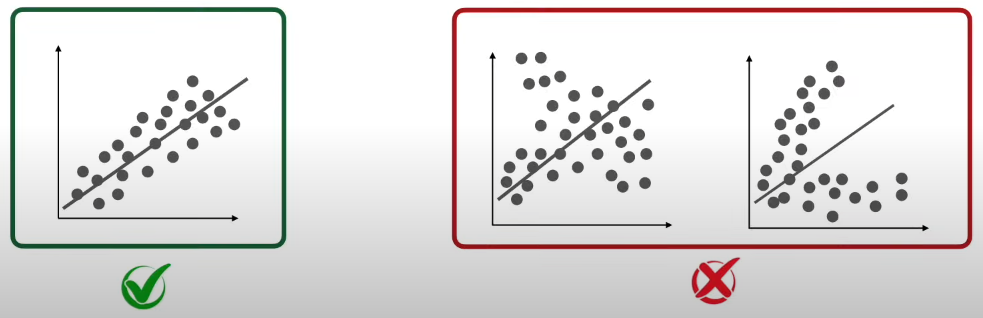
* случайные ошибки не скоррелированы (каждая из ошибок строго не зависит от других, появилась абсолютно случайно, потому что иначе у ошибок есть зависимость, а значит, мы не правильно построили модель).
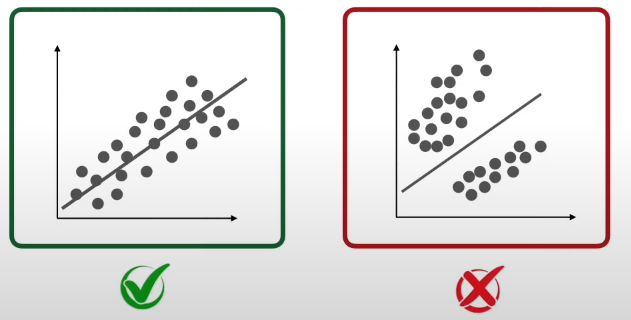

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью.

МНК:

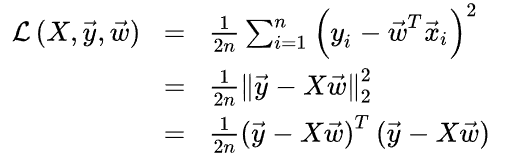

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно $\vec w$:

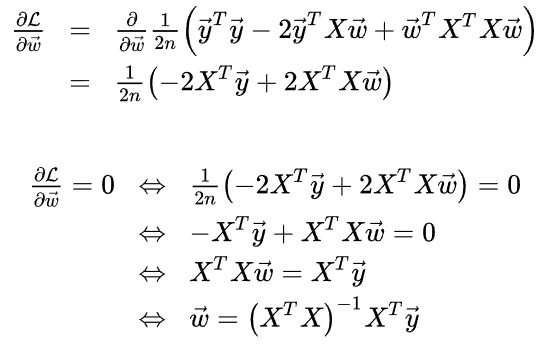

Решение по методу наименьших квадратов дает: $$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tabulate
import sklearn

plt.style.use('ggplot')

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [ ]:
def get_determinant_of_matrix(matrix):
    det = np.linalg.det(matrix)
    return det


def get_inverse_matrix(matrix):
    inv = np.linalg.inv(matrix)
    return inv


def get_w_lsm(x, y):
    xT = x.T
    xTx = xT @ x

    if get_determinant_of_matrix(xTx) == 0:
        return np.NaN

    inv_xTx = get_inverse_matrix(xTx)
    w = inv_xTx @ xT @ y
    return w


def mse(true, pred):
    return np.mean((true - pred)**2)


def mae(true, pred):
    return np.mean(np.abs(true - pred))

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
    """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
    X = np.linspace(-5, 5, n_points)
    y = 10 * X - 7

    X_train = X[0::2].reshape(-1, 1)
    # X_train = X[0::2]
    # X_train = np.insert(X_train, 0, 1).reshape(-1, 1)

    y_train = y[0::2] + np.random.randn(int(n_points / 2)) * 10
    # y_train = np.insert(y_train, 0, 1)

    X_test = X[1::2].reshape(-1, 1)
    # X_test = X[1::2]
    # X_test = np.insert(X_test, 0, 1).reshape(-1, 1)
    y_test = y[1::2] + np.random.randn(int(n_points / 2)) * 10
    # y_test = np.insert(y_test, 0, 1)

    print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples.')
    return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(200)

Generated 100 train samples and 100 test samples.



MAE of manual calculation train = 10.585
MAE of sklearn calculation train = 8.765

MSE of manual calculation train = 169.772
MSE of sklearn calculation train = 119.278

MAE of manual calculation test = 9.309
MAE of sklearn calculation test = 7.325

MSE of manual calculation test = 128.246
MSE of sklearn calculation test = 84.868

w manual = [9.83835582]
w sklearn = [9.81714332]


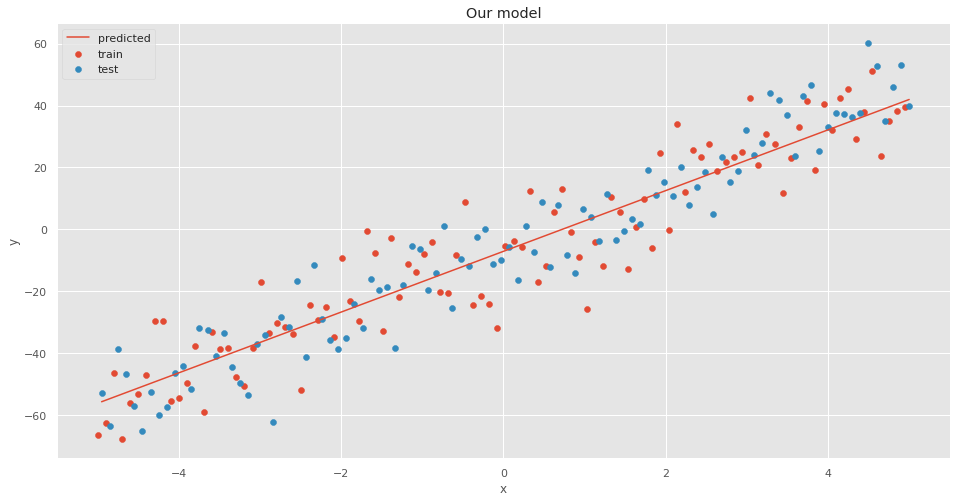

In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w_original = get_w_lsm(X_train, y_train)
y_train_predicted = X_train @ w_original
y_test_predicted = X_test @ w_original

train_absolute_error_original = mae(y_train, y_train_predicted)
train_squared_error_original = mse(y_train, y_train_predicted)

test_absolute_error_original = mae(y_test, y_test_predicted)
test_squared_error_original = mse(y_test, y_test_predicted)

### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
w_sklearn = model.coef_
bias_sklearn = model.intercept_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae_sklearn = sklearn.metrics.mean_absolute_error(y_train, y_train_pred)
test_mae_sklearn = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)

train_mse_sklearn = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
test_mse_sklearn = sklearn.metrics.mean_squared_error(y_test, y_test_pred)

print(f"\nMAE of manual calculation train = {round(train_absolute_error_original, 3)}")
print(f"MAE of sklearn calculation train = {round(train_mae_sklearn, 3)}")

print(f"\nMSE of manual calculation train = {round(train_squared_error_original, 3)}")
print(f"MSE of sklearn calculation train = {round(train_mse_sklearn, 3)}")

print(f"\nMAE of manual calculation test = {round(test_absolute_error_original, 3)}")
print(f"MAE of sklearn calculation test = {round(test_mae_sklearn, 3)}")

print(f"\nMSE of manual calculation test = {round(test_squared_error_original, 3)}")
print(f"MSE of sklearn calculation test = {round(test_mse_sklearn, 3)}")

print(f"\nw manual = {w_original}")
print(f"w sklearn = {w_sklearn}")

# print(f"\nEquation of the approximating line is: {w_original}x + {bias_sklearn}")

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w_sklearn) + bias_sklearn, label='predicted')
plt.legend(loc='best')
plt.title('Our model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

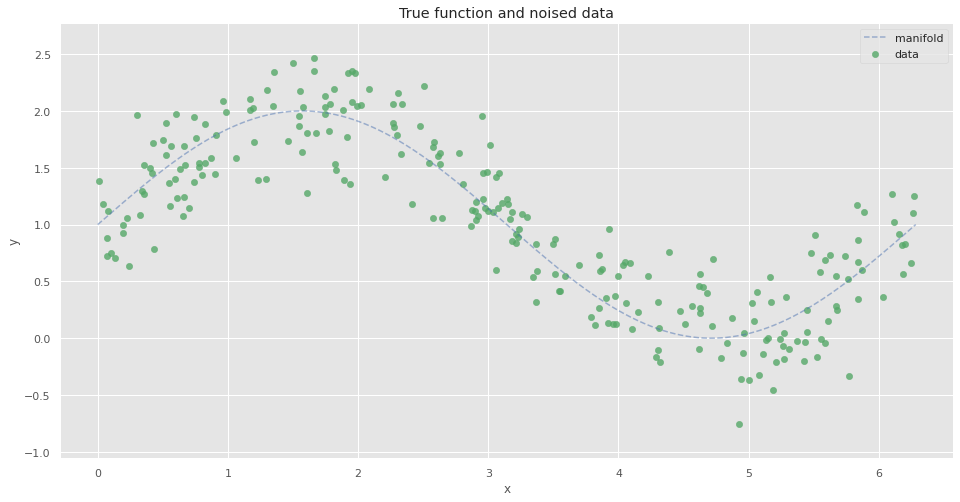

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=len(data['x_train']))
    return data

data = generate_wave_set(1000, 250)

plt.figure(figsize=(16, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True function and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


MAE of manual calculation train = 0.934
MAE of sklearn calculation train = 0.428

MSE of manual calculation train = 1.198
MSE of sklearn calculation train = 0.272

MAE of manual calculation test = 0.933
MAE of sklearn calculation test = 0.396

MSE of manual calculation test = 1.151
MSE of sklearn calculation test = 0.198

w manual = [0.16964941]
w sklearn = [-0.28103402]


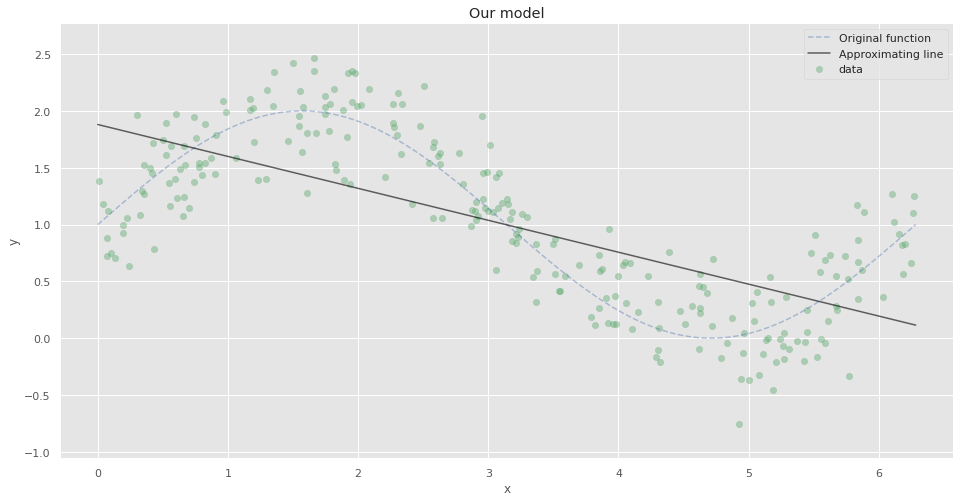

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

X_train = data['x_train'].reshape(-1, 1)
X_original = data['support'].reshape(-1, 1)

w_original = get_w_lsm(X_train, data['y_train'])
y_train_predicted = X_train @ w_original
y_test_predicted = X_original @ w_original

train_absolute_error_original = mae(data['y_train'], y_train_predicted)
train_squared_error_original = mse(data['y_train'], y_train_predicted)

test_absolute_error_original = mae(data['values'], y_test_predicted)
test_squared_error_original = mse(data['values'], y_test_predicted)


model = LinearRegression()
model.fit(X_train, data['y_train'])
w_sklearn = model.coef_
bias_sklearn = model.intercept_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_original)

train_mae_sklearn = sklearn.metrics.mean_absolute_error(data['y_train'], y_train_pred)
train_mse_sklearn = sklearn.metrics.mean_squared_error(data['y_train'], y_train_pred)

test_mae_sklearn = sklearn.metrics.mean_absolute_error(data['values'], y_test_pred)
test_mse_sklearn = sklearn.metrics.mean_squared_error(data['values'], y_test_pred)

print(f"\nMAE of manual calculation train = {round(train_absolute_error_original, 3)}")
print(f"MAE of sklearn calculation train = {round(train_mae_sklearn, 3)}")

print(f"\nMSE of manual calculation train = {round(train_squared_error_original, 3)}")
print(f"MSE of sklearn calculation train = {round(train_mse_sklearn, 3)}")

print(f"\nMAE of manual calculation test = {round(test_absolute_error_original, 3)}")
print(f"MAE of sklearn calculation test = {round(test_mae_sklearn, 3)}")

print(f"\nMSE of manual calculation test = {round(test_squared_error_original, 3)}")
print(f"MSE of sklearn calculation test = {round(test_mse_sklearn, 3)}")

print(f"\nw manual = {w_original}")
print(f"w sklearn = {w_sklearn}")


plt.figure(figsize=(16, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.4, label='Original function')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.4, label='data')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w_sklearn) + bias_sklearn, 'black', alpha=0.6, label='Approximating line')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('Our model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

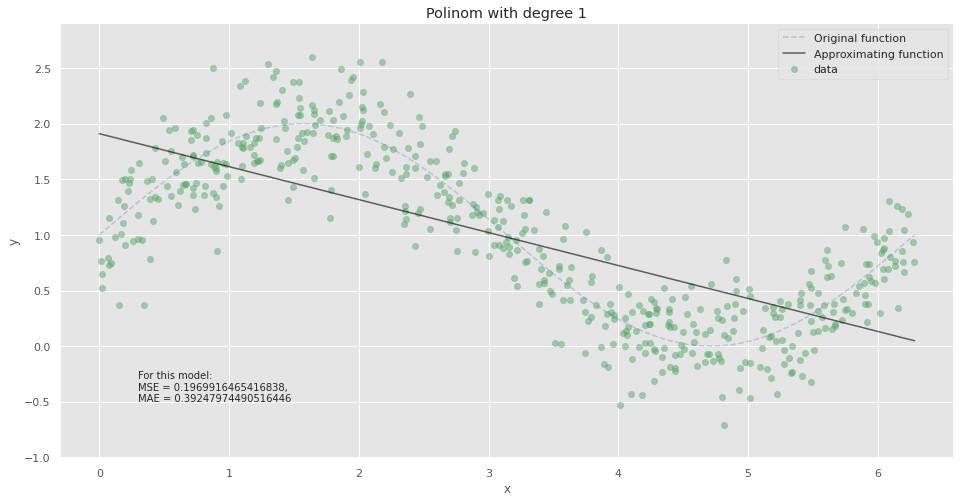

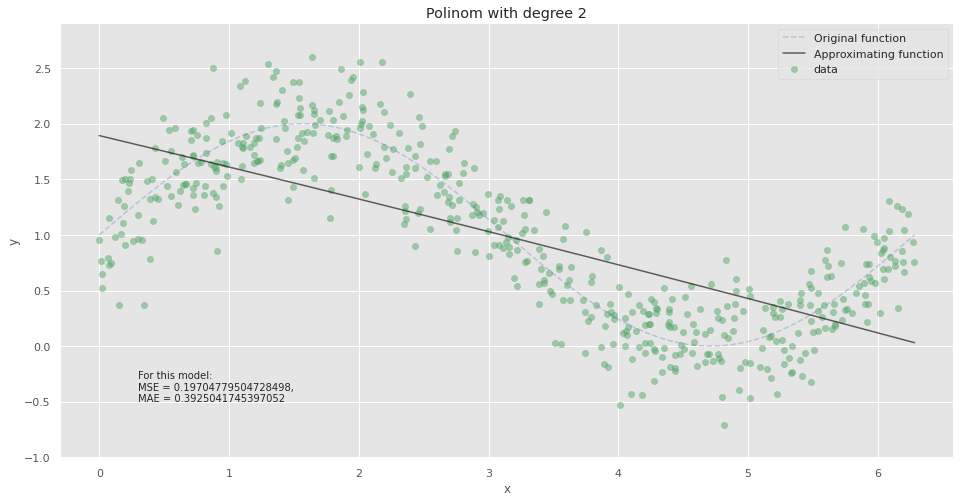

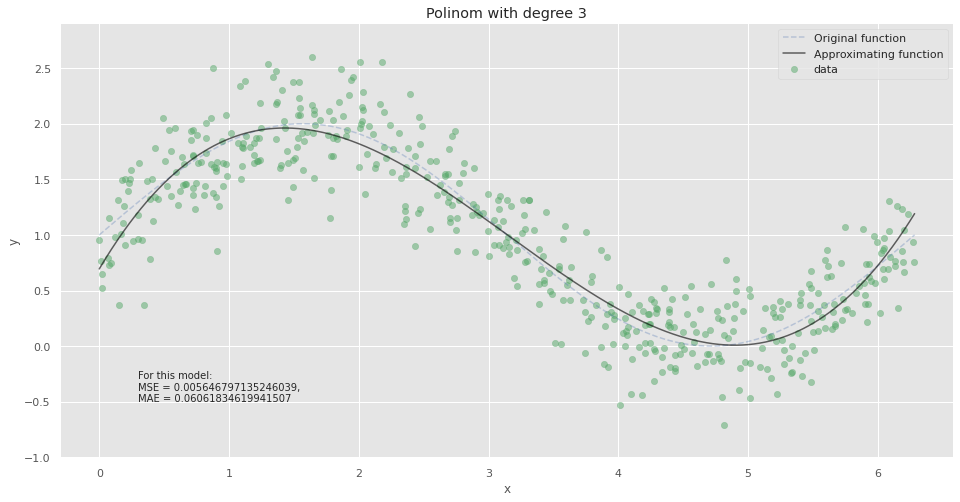

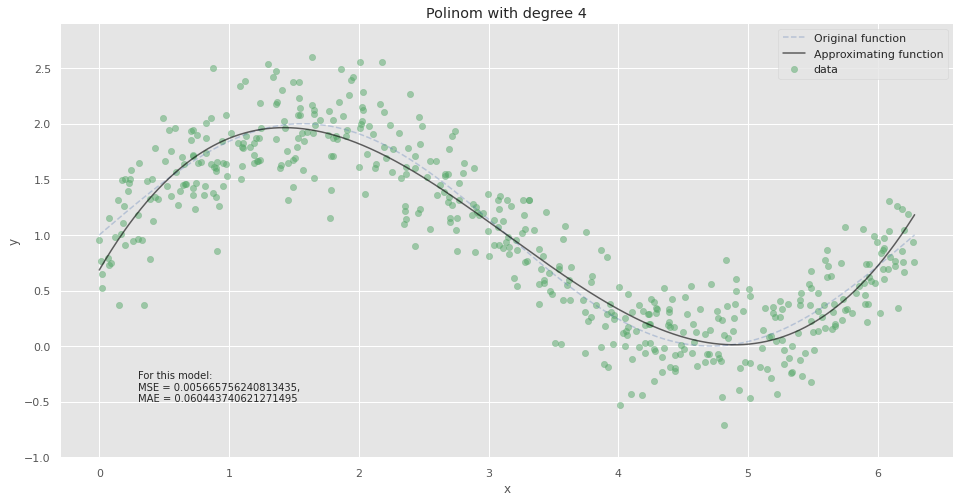

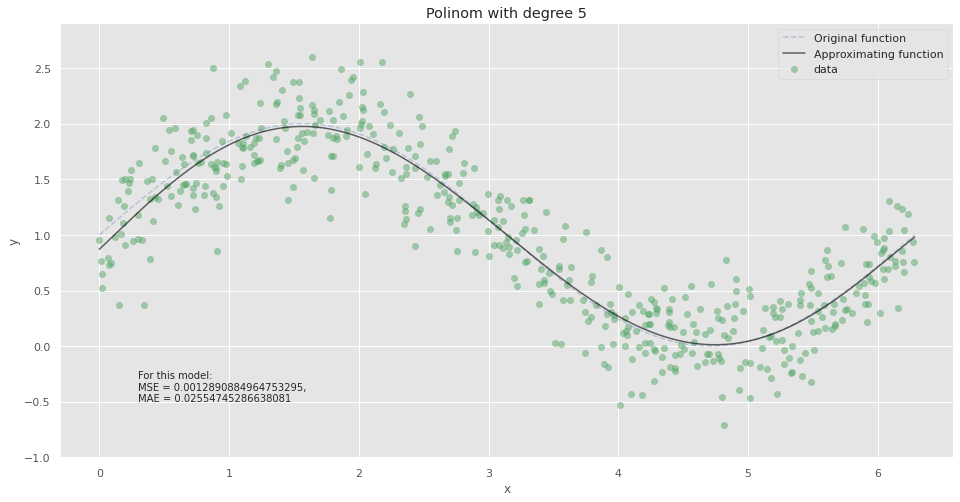

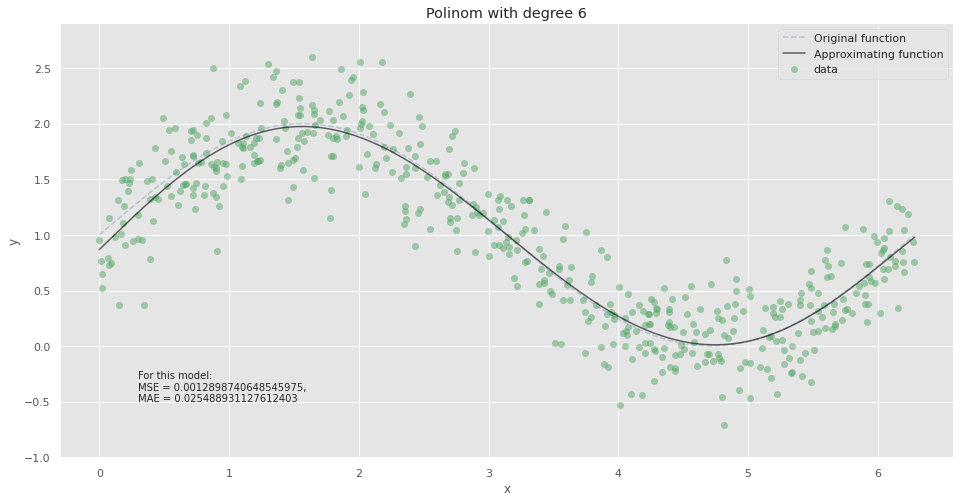

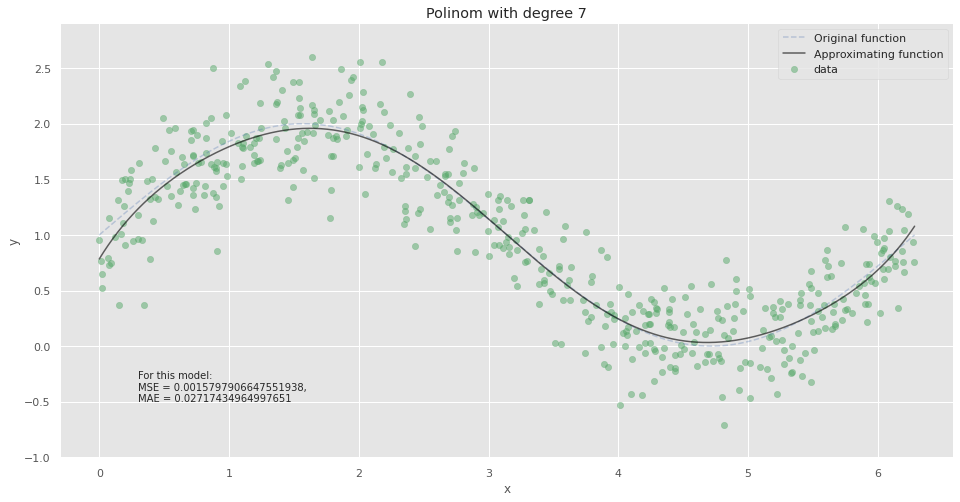

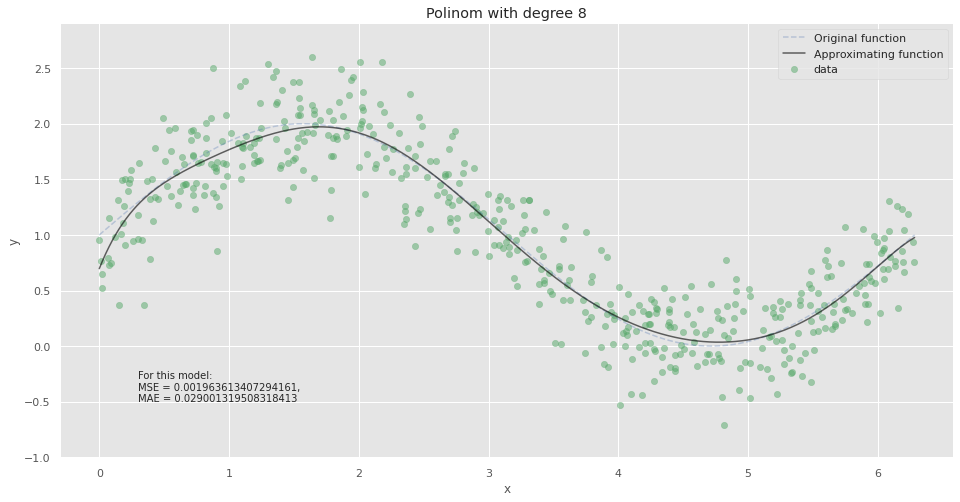

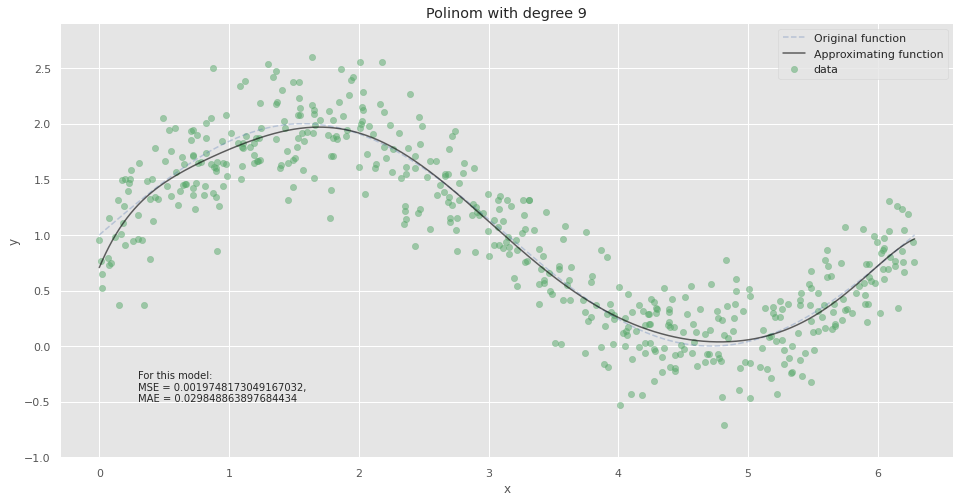



Лучшая с точки зрения средней абсолютной ошибки степень полинома: 6
Лучшая с точки зрения средней квадратичной ошибки степень полинома: 5
Лучшая с точки зрения переобучаемости: 3


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

data = generate_wave_set(2000, 500)
X_train = data['x_train'].reshape(-1, 1)
X_test  = data['support'].reshape(-1, 1)
Y_train = data['y_train']
Y_test  = data['values']

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

def get_polinomial_models(degrees, X_trn, Y_trn, X_tst, Y_tst):
    maes = []
    mses = []
    models = []
    for deg in degrees:
        pfs = PolynomialFeatures(deg)
        x_train = X_trn
        y_train = Y_trn
        x_test = X_tst
        y_test = Y_tst

        x_train = pfs.fit_transform(x_train)
        x_test  = pfs.fit_transform(x_test)

        model = LinearRegression()
        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        test_mae_sklearn = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
        test_mse_sklearn = sklearn.metrics.mean_squared_error(y_test, y_test_pred)

        maes.append(test_mae_sklearn)
        mses.append(test_mse_sklearn)
        models.append(model)

        plt.figure(figsize=(16, 8))
        margin = 0.3
        plt.plot(X_tst, Y_tst, 'b--', alpha=0.3, label='Original function')
        plt.scatter(X_trn, Y_trn, 40, 'g', 'o', alpha=0.5, label='data')
        plt.plot(X_tst, y_test_pred, 'black', alpha=0.6, label='Approximating function')
        plt.text(0.3, -0.5, f'For this model:\nMSE = {test_mse_sklearn},\nMAE = {test_mae_sklearn}')
        plt.xlim(X_trn.min() - margin, X_trn.max() + margin)
        plt.ylim(Y_trn.min() - margin, Y_trn.max() + margin)
        plt.legend(loc='upper right')
        plt.title(f'Polinom with degree {deg}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return models, maes, mses
        
models_polinoms, maes, mses = get_polinomial_models(degrees, X_train, Y_train, X_test, Y_test)

print(f"\n\nЛучшая с точки зрения средней абсолютной ошибки степень полинома: {degrees[maes.index(min(maes))]}")
print(f"Лучшая с точки зрения средней квадратичной ошибки степень полинома: {degrees[mses.index(min(mses))]}")
print(f"Лучшая с точки зрения переобучаемости: 3")
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

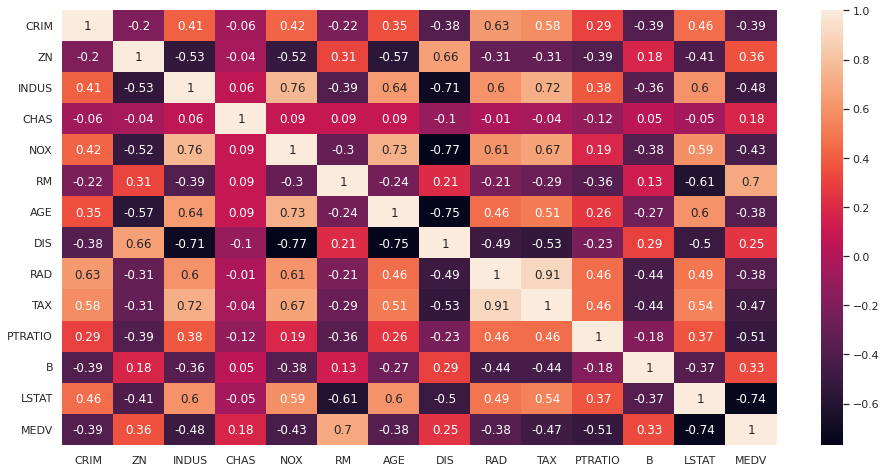

In [ ]:
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston_data = pd.DataFrame(house_data.data, columns=house_data.feature_names)
boston_data['MEDV'] = house_data.target
correlation_matrix = boston_data.corr().round(2)
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data=correlation_matrix, annot=True, )

Здесь коэффициент корреляции может принимать значения (-1; 1). Если значение корреляции близко к концам промежутка, значит между переменными существует сильная зависимость. Чтобы соответствовать модели линейной регрессии, мы выбираем те особенности, которые существуют в зависимости (любой) от нашей целевой переменной. При этом очень важно недопустить ситуацию мультиколлинеарности: 2 или больше переменных зависят от друг друга. Следовательно, одновременно включать их в нашу модель нельзя, т.к. они взаимно уведут расчеты и исказят обстановку. В нашем случае - RAD,TAX имеют соотношение 0,9.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X = pd.DataFrame(
    np.c_[
        boston_data['LSTAT'],
        boston_data['RM'],
        boston_data['PTRATIO'],
        boston_data['INDUS'],
        boston_data['ZN'],
        boston_data['CRIM'],
        boston_data['B']
    ],
    columns = ['LSTAT','RM', 'PTRATIO', 'INDUS', 'ZN', 'CRIM', 'B' ])

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
Y = boston_data['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

print(f'\nMSE of train small dataset = {mean_squared_error(Y_train, y_train_pred)}.')
print(f'MAE of train small dataset = {mean_absolute_error(Y_train, y_train_pred)}.')
print(f'\nMSE of test small dataset = {mean_squared_error(Y_test, y_test_pred)}.')
print(f'MAE of test small dataset = {mean_absolute_error(Y_test, y_test_pred)}.')



MSE of train small dataset = 22.692040050675075.
MAE of train small dataset = 3.304816328544996.

MSE of test small dataset = 41.776708031575275.
MAE of test small dataset = 4.2782616948894265.


In [ ]:
X = pd.DataFrame(house_data.data, columns=house_data.feature_names)
Y = house_data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, Y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'MSE of train initail dataset = {mean_squared_error(Y_train, y_train_pred)}.')
print(f'MAE of train initail dataset = {mean_absolute_error(Y_train, y_train_pred)}.')
print(f'MSE of test initail dataset = {mean_squared_error(Y_test, y_test_pred)}.')
print(f'MAE of test initail dataset = {mean_absolute_error(Y_test, y_test_pred)}.')

MSE of train initail dataset = 19.326470203585725.
MAE of train initail dataset = 3.1031563965794344.
MSE of test initail dataset = 33.44897999767652.
MAE of test initail dataset = 3.8429092204444957.
